<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(1_6)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.6_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,32.098787,79.268431,27.489083,148.856301,123.674623,25.181678
1,0.0,1.0,90.028000,58.462227,16.238583,174.728810,156.631084,18.097726
2,0.0,2.0,48.371334,36.215648,-3.956058,90.630923,102.566481,-11.935558
3,0.0,3.0,53.815299,25.878314,12.539683,102.233295,98.822992,3.410303
4,0.0,4.0,29.607527,79.878613,49.366378,168.852519,122.025065,46.827453
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,38.967404,51.642274,-11.756226,88.853452,95.658784,-6.805333
19996,999.0,16.0,54.647625,36.639423,-18.537682,82.749366,99.408095,-16.658729
19997,999.0,17.0,76.467409,97.316012,38.799493,222.582913,189.262897,33.320016
19998,999.0,18.0,29.096282,38.082528,-20.713369,56.465440,69.424213,-12.958772


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    32.098787  79.268431  27.489083  148.856301  123.674623   
      1.0    90.028000  58.462227  16.238583  174.728810  156.631084   
      2.0    48.371334  36.215648  -3.956058   90.630923  102.566481   
      3.0    53.815299  25.878314  12.539683  102.233295   98.822992   
      4.0    29.607527  79.878613  49.366378  168.852519  122.025065   
...                ...        ...        ...         ...         ...   
999.0 15.0   38.967404  51.642274 -11.756226   88.853452   95.658784   
      16.0   54.647625  36.639423 -18.537682   82.749366   99.408095   
      17.0   76.467409  97.316012  38.799493  222.582913  189.262897   
      18.0   29.096282  38.082528 -20.713369   56.465440   69.424213   
      19.0   88.622970  22.225829  -3.709844  117.138955  126.310182   

                 e_hat  
rep   index             
0.0   0.0    25.181678  
      1.0    18.097726  
      2.0   -11.935558  
      3.0     3.410303  
      4.0    46.827453  
...                ...  
999.0 15.0   -6.805333  
      16.0  -16.658729  
      17.0   33.320016  
      18.0  -12.958772  
      19.0   -9.171228  

[20000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    32.098787  79.268431  27.489083  148.856301  123.674623   
      1.0    90.028000  58.462227  16.238583  174.728810  156.631084   
      2.0    48.371334  36.215648  -3.956058   90.630923  102.566481   
      3.0    53.815299  25.878314  12.539683  102.233295   98.822992   
      4.0    29.607527  79.878613  49.366378  168.852519  122.025065   
...                ...        ...        ...         ...         ...   
999.0 15.0   38.967404  51.642274 -11.756226   88.853452   95.658784   
      16.0   54.647625  36.639423 -18.537682   82.749366   99.408095   
      17.0   76.467409  97.316012  38.799493  222.582913  189.262897   
      18.0   29.096282  38.082528 -20.713369   56.465440   69.424213   
      19.0   88.622970  22.225829  -3.709844  117.138955  126.310182   

                 e_hat  
rep   index             
0.0   0.0    25.181678  
      1.0    18.097726  
      2.0   -11.935558  
      3.0     3.410303  
      4.0    46.827453  
...                ...  
999.0 15.0   -6.805333  
      16.0  -16.658729  
      17.0   33.320016  
      18.0  -12.958772  
      19.0   -9.171228  

[20000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,32.098787,79.268431,27.489083,148.856301,123.674623,25.181678
1,0.0,1.0,90.028000,58.462227,16.238583,174.728810,156.631084,18.097726
2,0.0,2.0,48.371334,36.215648,-3.956058,90.630923,102.566481,-11.935558
3,0.0,3.0,53.815299,25.878314,12.539683,102.233295,98.822992,3.410303
4,0.0,4.0,29.607527,79.878613,49.366378,168.852519,122.025065,46.827453
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,38.967404,51.642274,-11.756226,88.853452,95.658784,-6.805333
19996,999.0,16.0,54.647625,36.639423,-18.537682,82.749366,99.408095,-16.658729
19997,999.0,17.0,76.467409,97.316012,38.799493,222.582913,189.262897,33.320016
19998,999.0,18.0,29.096282,38.082528,-20.713369,56.465440,69.424213,-12.958772


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    32.098787  79.268431  27.489083  148.856301  123.674623   
      1.0    90.028000  58.462227  16.238583  174.728810  156.631084   
      2.0    48.371334  36.215648  -3.956058   90.630923  102.566481   
      3.0    53.815299  25.878314  12.539683  102.233295   98.822992   
      4.0    29.607527  79.878613  49.366378  168.852519  122.025065   
...                ...        ...        ...         ...         ...   
999.0 15.0   38.967404  51.642274 -11.756226   88.853452   95.658784   
      16.0   54.647625  36.639423 -18.537682   82.749366   99.408095   
      17.0   76.467409  97.316012  38.799493  222.582913  189.262897   
      18.0   29.096282  38.082528 -20.713369   56.465440   69.424213   
      19.0   88.622970  22.225829  -3.709844  117.138955  126.310182   

                 e_hat  
rep   index             
0.0   0.0    25.181678  
      1.0    18.097726  
      2.0   -11.935558  
      3.0     3.410303  
      4.0    46.827453  
...                ...  
999.0 15.0   -6.805333  
      16.0  -16.658729  
      17.0   33.320016  
      18.0  -12.958772  
      19.0   -9.171228  

[20000 rows x 6 columns]

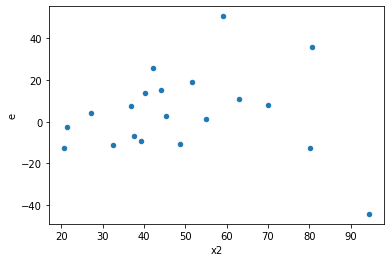

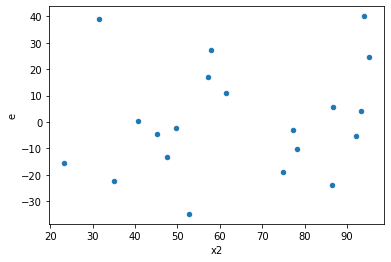

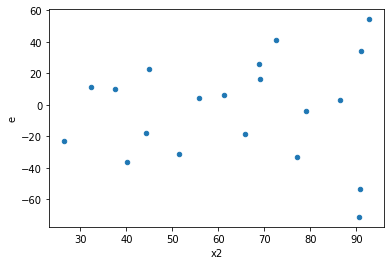

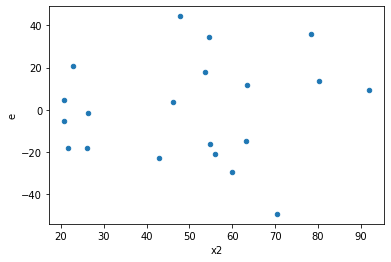

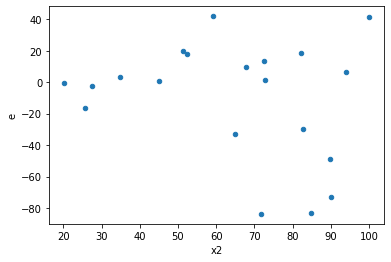

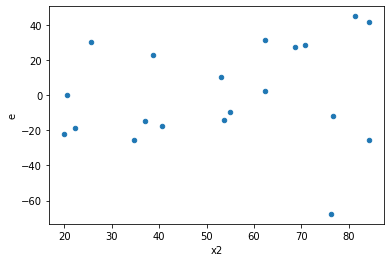

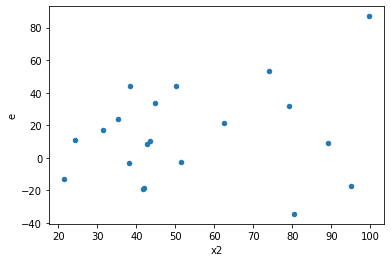

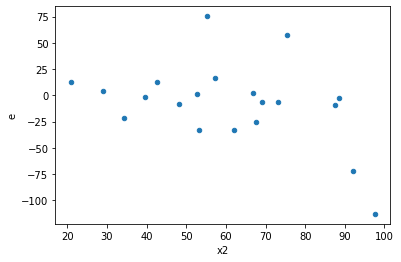

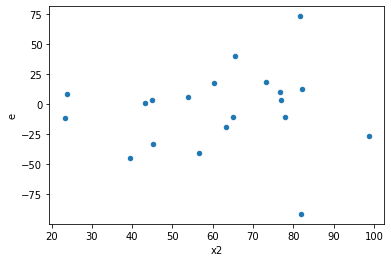

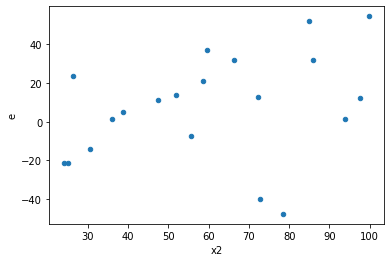

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,10.0,6.0,5513.849764903363,7882.764343386179,551.3849764903364,1313.7940572310297,2.3827164562835264,0.30006292694796155,0.8499685365260192,0.15003146347398078,Reject005=1 : Homoscedasticity
2.0,6.0,10.0,2054.398087851131,8304.558941570986,342.39968130852185,830.4558941570986,2.4253991446002834,0.2069698607892807,0.8965150696053596,0.10348493039464035,Reject005=1 : Homoscedasticity
5.0,5.0,11.0,2224.8988911728634,16379.248453908505,444.9797782345727,1489.022586718955,3.346270234181319,0.08841440533651879,0.9557927973317406,0.04420720266825939,Reject005=1 : Homoscedasticity
6.0,7.0,9.0,2818.0429644978467,5263.069925520789,402.57756635683523,584.7855472800877,1.452603413975998,0.5889655194841923,0.7055172402579039,0.29448275974209615,Reject005=1 : Homoscedasticity
8.0,7.0,9.0,2141.7745226200464,4752.9847791546745,305.9677889457209,528.1094199060749,1.7260294677612689,0.4375890808764442,0.7812054595617779,0.2187945404382221,Reject005=1 : Homoscedasticity
10.0,6.0,10.0,1160.7999631350983,2511.4943594423544,193.46666052251638,251.14943594423545,1.2981535695397282,0.6809440865861767,0.6595279567069117,0.34047204329308833,Reject005=1 : Homoscedasticity
15.0,6.0,10.0,3150.304333725935,10840.006201165977,525.0507222876558,1084.0006201165977,2.0645636204319207,0.2972829057079498,0.8513585471460251,0.1486414528539749,Reject005=1 : Homoscedasticity
16.0,11.0,5.0,5177.169449638814,2551.168906723588,470.6517681489831,510.2337813447176,1.0841004238683853,0.9960374406125749,0.5019812796937125,0.49801872030628747,Reject005=1 : Homoscedasticity
17.0,12.0,4.0,8678.432630796276,6373.647185197019,723.202719233023,1593.4117962992548,2.2032713012875744,0.4639713296195507,0.7680143351902247,0.23198566480977534,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,6.0,5513.849764903363,7882.764343386179,551.3849764903364,1313.7940572310297,2.3827164562835264,0.30006292694796155,Reject005=1 : Homoscedasticity
1.0,11.0,5.0,9199.060617125033,721.838901333151,836.2782379204575,144.36778026663018,0.172631277151997,0.014680861791150662,Reject005=0 : Heteroscedasticity
2.0,6.0,10.0,2054.398087851131,8304.558941570986,342.39968130852185,830.4558941570986,2.4253991446002834,0.2069698607892807,Reject005=1 : Homoscedasticity
3.0,8.0,8.0,4179.296705270917,3115.249268882906,522.4120881588647,389.40615861036326,0.7454003600543514,0.6876150054550701,Reject005=1 : Homoscedasticity
4.0,5.0,11.0,4824.078918198307,6118.15445395137,964.8157836396615,556.1958594501245,0.5764788147970971,0.5648755751258858,Reject005=1 : Homoscedasticity
5.0,5.0,11.0,2224.8988911728634,16379.248453908505,444.9797782345727,1489.022586718955,3.346270234181319,0.08841440533651879,Reject005=1 : Homoscedasticity
6.0,7.0,9.0,2818.0429644978467,5263.069925520789,402.57756635683523,584.7855472800877,1.452603413975998,0.5889655194841923,Reject005=1 : Homoscedasticity
7.0,7.0,9.0,5090.190614910232,3728.8495478473374,727.1700878443189,414.3166164274819,0.5697657581814389,0.47058607133871005,Reject005=1 : Homoscedasticity
8.0,7.0,9.0,2141.7745226200464,4752.9847791546745,305.9677889457209,528.1094199060749,1.7260294677612689,0.4375890808764442,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      765
Reject005=0 : Heteroscedasticity    235
Name: Result_test, dtype: int64